In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Capgemini/Hackathon/notebooks')

Mounted at /content/drive


In [ ]:
title_submission = pd.read_csv(os.path.join('..', 'data', 'title_submission4.csv'), index_col=['id'])
desc_submission = pd.read_csv(os.path.join('..', 'data', 'desc_submission4.csv'), index_col=['id'])

title_softmax = pd.read_csv(os.path.join('..', 'data', 'title_softmax4.csv'), index_col=['id'])
desc_softmax = pd.read_csv(os.path.join('..', 'data', 'desc_softmax4.csv'), index_col=['id'])

concat_softmax = pd.read_csv(os.path.join('..', 'data', 'title_softmax4.csv'), index_col=['id'])
desc_softmax = pd.read_csv(os.path.join('..', 'data', 'desc_softmax4.csv'), index_col=['id'])

In [ ]:
desc_submission_full = title_submission.merge(desc_submission, how='outer', left_index=True, right_index=True)
desc_submission_full.rename({'class_x': 'title', 'class_y': 'description'}, axis=1, inplace=True)
desc_submission_full['description'].fillna(desc_submission_full['title'], inplace=True)
desc_submission_full['description'] = desc_submission_full['description'].astype(int)
desc_submission_full['agreed'] = desc_submission_full['description'] == desc_submission_full['title']
desc_submission_full['agreed'].sum() / len(desc_submission_full)

0.9489916963226572

In [ ]:
list_index_false = desc_submission_full[desc_submission_full['agreed'] == False].index.values
list_index_false
print(len(list_index_false))

86


In [ ]:
# claque_au_sol = desc_submission_full.rename({'description': 'class'}, axis=1)
# claque_au_sol = claque_au_sol[['class']]
# claque_au_sol.to_csv(os.path.join('..', 'data', 'claqué_au_sol_02.csv'))

In [ ]:
softmax_full = title_softmax.merge(desc_softmax, how='outer', left_index=True, right_index=True)
softmax_full['desc_0'].fillna(softmax_full['title_0'], inplace=True)
softmax_full['desc_1'].fillna(softmax_full['title_1'], inplace=True)
softmax_full['desc_2'].fillna(softmax_full['title_2'], inplace=True)
softmax_full['desc_3'].fillna(softmax_full['title_3'], inplace=True)
softmax_full['sum_0'] = (softmax_full['desc_0'] + softmax_full['title_0']) / 2
softmax_full['sum_1'] = (softmax_full['desc_1'] + softmax_full['title_1']) / 2
softmax_full['sum_2'] = (softmax_full['desc_2'] + softmax_full['title_2']) / 2
softmax_full['sum_3'] = (softmax_full['desc_3'] + softmax_full['title_3']) / 2
softmax_full.head()

,title_0,title_1,title_2,title_3,desc_0,desc_1,desc_2,desc_3,sum_0,sum_1,sum_2,sum_3
id,,,,,,,,,,,,
0,0.925032,0.000875,0.001123,0.072970,0.956927,0.005032,0.002006,0.036034,0.940980,0.002954,0.001564,0.054502
1,0.000561,0.927120,0.071119,0.001200,0.001476,0.989306,0.007650,0.001568,0.001018,0.958213,0.039384,0.001384
2,0.000012,0.000053,0.999874,0.000060,0.000012,0.000053,0.999874,0.000060,0.000012,0.000053,0.999874,0.000060
3,0.000019,0.000021,0.999900,0.000060,0.004360,0.086485,0.899608,0.009547,0.002189,0.043253,0.949754,0.004804
4,0.955927,0.000683,0.000733,0.042657,0.956804,0.003934,0.002746,0.036516,0.956365,0.002309,0.001740,0.039586


In [ ]:
softmax_full.loc[list_index_false]
softmax_full['class'] = softmax_full[['sum_0', 'sum_1', 'sum_2', 'sum_3']].idxmax(axis=1)
softmax_full['class'] = softmax_full['class'].apply(lambda x: x.split('_')[-1])
softmax_full['confidence'] = softmax_full[['sum_0', 'sum_1', 'sum_2', 'sum_3']].max(axis=1)
softmax_full.index.rename('id', inplace=True)
softmax_full.head()

,title_0,title_1,title_2,title_3,desc_0,desc_1,desc_2,desc_3,sum_0,sum_1,sum_2,sum_3,class,confidence
id,,,,,,,,,,,,,,
0,0.925032,0.000875,0.001123,0.072970,0.956927,0.005032,0.002006,0.036034,0.940980,0.002954,0.001564,0.054502,0,0.940980
1,0.000561,0.927120,0.071119,0.001200,0.001476,0.989306,0.007650,0.001568,0.001018,0.958213,0.039384,0.001384,1,0.958213
2,0.000012,0.000053,0.999874,0.000060,0.000012,0.000053,0.999874,0.000060,0.000012,0.000053,0.999874,0.000060,2,0.999874
3,0.000019,0.000021,0.999900,0.000060,0.004360,0.086485,0.899608,0.009547,0.002189,0.043253,0.949754,0.004804,2,0.949754
4,0.955927,0.000683,0.000733,0.042657,0.956804,0.003934,0.002746,0.036516,0.956365,0.002309,0.001740,0.039586,0,0.956365


In [ ]:
softmax_full[['class']].to_csv(os.path.join('..', 'data', 'claqué_au_sol_04.csv'))

In [ ]:
min(softmax_full['confidence'])

0.39082883150000003

(array([   2.,   21.,   31.,   14.,   25.,   20.,   28.,   43.,  128.,
        1374.]),
 array([0.39082883, 0.45173652, 0.51264421, 0.57355189, 0.63445958,
        0.69536727, 0.75627495, 0.81718264, 0.87809033, 0.93899801,
        0.9999057 ]),
 <a list of 10 Patch objects>)

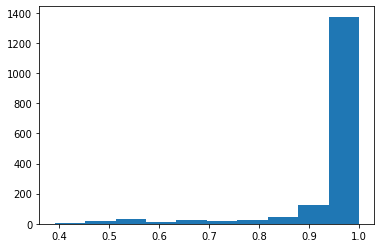

In [ ]:
plt.hist(softmax_full['confidence'])

In [ ]:
X_test = pd.read_csv(os.path.join('..', 'data', 'test.csv'))
full = softmax_full.merge(X_test, left_index=True, right_index=True)
full.head()

,title_0,title_1,title_2,title_3,desc_0,desc_1,desc_2,desc_3,sum_0,sum_1,sum_2,sum_3,class,confidence,id,title,description
id,,,,,,,,,,,,,,,,,
0,0.925032,0.000875,0.001123,0.072970,0.956927,0.005032,0.002006,0.036034,0.940980,0.002954,0.001564,0.054502,0,0.940980,0,PDP 048-121-NA Afterglow Wired Controller for ...,Enhance your gaming experience with the Afterg...
1,0.000561,0.927120,0.071119,0.001200,0.001476,0.989306,0.007650,0.001568,0.001018,0.958213,0.039384,0.001384,1,0.958213,1,Gold Medal Groomers Ear Powder (30 Grams),"Great for relieving irritated itchy ears, Groo..."
2,0.000012,0.000053,0.999874,0.000060,0.000012,0.000053,0.999874,0.000060,0.000012,0.000053,0.999874,0.000060,2,0.999874,2,Sports Research Sweet Sweat Premium Waist Trim...,NaN
3,0.000019,0.000021,0.999900,0.000060,0.004360,0.086485,0.899608,0.009547,0.002189,0.043253,0.949754,0.004804,2,0.949754,3,Gildan Men's Fleece Open Bottom Pocketed Pant,Gildan is one of the world's largest verticall...
4,0.955927,0.000683,0.000733,0.042657,0.956804,0.003934,0.002746,0.036516,0.956365,0.002309,0.001740,0.039586,0,0.956365,4,Sennheiser GAME ZERO Gaming Headset- Black,The new closed back G4ME ZERO headset is ideal...


In [ ]:
full.to_csv(os.path.join('..', 'data', 'big_bert_analysis.csv'), sep='~')

In [ ]:
lol = pd.read_csv('../data/claqué_au_sol_05.csv', index_col=['id'], sep=';')
lol.to_csv('../data/claqué_au_sol_05.csv')

In [ ]:
# X_train_df = X_train_title.to_frame()
# X_train_df['prepro'] = X_train_df['description'].apply(lambda review: remove_stopwords(review))
# X_train_df['prepro_len'] = X_train_df['prepro'].apply(lambda review: len(review.split()))
# X_train_df['og_len'] = X_train_df['description'].apply(lambda review: len(review.split()))